In [8]:
! pip install git+https://github.com/pik-copan/pyunicorn.git#egg=pyunicorn

  Cloning https://github.com/pik-copan/pyunicorn.git to /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-install-o0vli8da/pyunicorn_ee229b3a3af040ca8d4ffc5217d679c6
  Running command git clone --filter=blob:none -q https://github.com/pik-copan/pyunicorn.git /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-install-o0vli8da/pyunicorn_ee229b3a3af040ca8d4ffc5217d679c6
  Resolved https://github.com/pik-copan/pyunicorn.git to commit 3a8ba3ab7522ce49ee79b74f1ea7e0fc6f934a0c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyunicorn: filename=pyunicorn-0.7.0a1-cp310-cp310-macosx_10_9_universal2.whl size=763182 sha256=bd42d099d758f39c4a83553797e6126db3cacdf78f8f43ace1e58f5733684315
  Stored in directory: /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-ephem-wheel-cache-iw0el7py/wheels/dc/e5/4e/bf6d9844b94fe4fe91c6d4055228f6af50c7778829de1dadcd
Successful

In [85]:
! pip install git+https://github.com/manu-mannattil/nolitsa.git

  Cloning https://github.com/manu-mannattil/nolitsa.git to /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-req-build-d1n4r8k4
  Running command git clone --filter=blob:none -q https://github.com/manu-mannattil/nolitsa.git /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-req-build-d1n4r8k4
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 40befcb1ce5535703f90ffe87209181bcdb5eb5c
  Preparing metadata (setup.py) ... done
  Created wheel for nolitsa: filename=nolitsa-0.1-py3-none-any.whl size=21970 sha256=0656b9ff2afdf1848f7ac0450e0f2c78c31351b5e193dfd83ccfa3881721f944
  Stored in directory: /private/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/pip-ephem-wheel-cache-18hed8m1/wheels/0e/f4/40/d6094caec491124c7302bf2741c9d0d9897bb655c18750e12c
Successfully built nolitsa
You should consider upgrading via the '/Users/admin/Documents/MscProject/venv/bin/python -m pip install --upgrade pip' command.


In [186]:
from dfc_functions import FetchROI
from pyunicorn.timeseries.surrogates import Surrogates
import os
import matplotlib.pyplot as plt
from nolitsa import delay
from nolitsa import dimension
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import normalize
import matplotlib
from scipy.interpolate import griddata
import pandas as pd

import scipy.stats as stats

In [46]:
roi_files = os.listdir(os.path.join(os.getcwd(), 'rois_cc200'))

In [47]:
fetch = FetchROI(os.path.join(os.getcwd(), 'rois_cc200'))

In [48]:
test = fetch.fetch_roi_avg_ts(roi_files[0])

In [49]:
t = normalize(test)

In [50]:
ts1 = t[:,0]

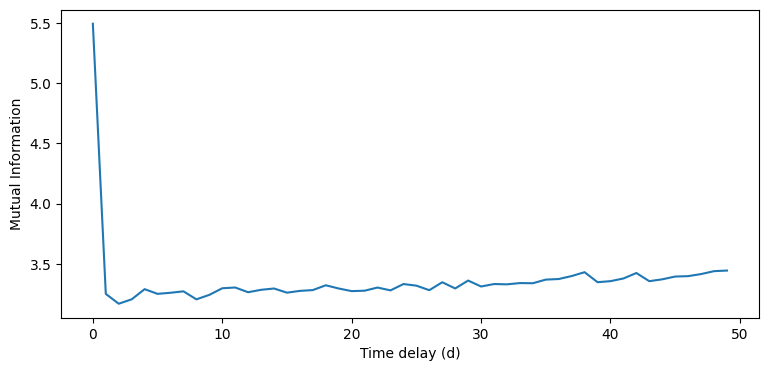

In [51]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(ts1, maxtau=50))

In [52]:
delay.dmi(ts1, maxtau=20)

array([5.49244033, 3.25025249, 3.16885789, 3.20539827, 3.28959803,
       3.25076906, 3.25972261, 3.27164211, 3.20518444, 3.24229014,
       3.29718257, 3.3034822 , 3.26417623, 3.28438958, 3.29516683,
       3.26052759, 3.27542901, 3.28211653, 3.32199249, 3.29506286])

In [53]:
def delay_opt(x, max_delay=20):
    mi = delay.dmi(x, maxtau=max_delay)
    diffmi = np.diff(mi)
    return np.where(diffmi > 0)[0][0]

In [54]:
delay_opt(ts1)

2

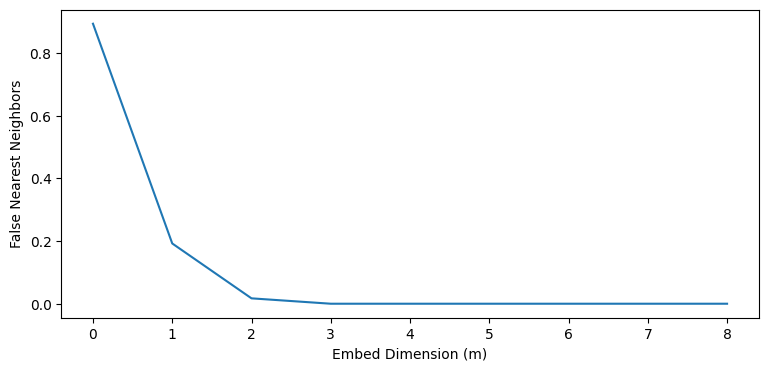

In [630]:
dim = np.arange(1, 10)
f1, f2, f3 = dimension.fnn(ts1, tau=1, dim=dim)
plt.figure(figsize=(9,4))
plt.xlabel('Embed Dimension (m)')
plt.ylabel('False Nearest Neighbors')
plt.plot(f1)

In [631]:
def dimension_opt(x, tau, max_dim=10):
    dim = np.arange(1, max_dim)
    f1, f2, f3 = dimension.fnn(x, tau=tau, dim=dim)
    return np.where(f1 < 0.2)[0][0] + 1


In [632]:
dimension_opt(ts1,4)

3

In [5]:
data = test

In [6]:
data = normalize(data.T)

In [7]:
data

array([[ 0.02420204,  0.0162075 , -0.00320862, ..., -0.06809674,
        -0.02367876,  0.02702081],
       [-0.00559596,  0.02276463,  0.01391988, ...,  0.09185366,
         0.13775143,  0.11056029],
       [-0.03544477, -0.05856815, -0.06852806, ...,  0.09088903,
         0.03008343, -0.02758834],
       ...,
       [-0.055276  , -0.02576342,  0.04317267, ..., -0.03159602,
        -0.03148396, -0.00691978],
       [ 0.00403816, -0.0396626 , -0.04306879, ..., -0.01592826,
         0.04027361,  0.04028011],
       [-0.00449744, -0.00498246,  0.02228482, ...,  0.05222413,
         0.0069728 , -0.03412537]])

In [661]:
twinSurr = Surrogates(data)

Generated an instance of the Surrogates class.


In [662]:
em = twinSurr.embed_time_series_array(data, dimension=3,delay=1)

Embedding all time series in dimension 3 and with lag 1 ...


In [663]:
em.shape

(200, 234, 3)

In [664]:
em[1]

array([[-5.59596180e-03,  2.27646345e-02,  1.39198786e-02],
       [ 2.27646345e-02,  1.39198786e-02, -3.98037364e-02],
       [ 1.39198786e-02, -3.98037364e-02, -8.40011926e-02],
       [-3.98037364e-02, -8.40011926e-02, -6.10470257e-02],
       [-8.40011926e-02, -6.10470257e-02,  1.40191426e-02],
       [-6.10470257e-02,  1.40191426e-02,  6.07548545e-02],
       [ 1.40191426e-02,  6.07548545e-02,  2.59482688e-02],
       [ 6.07548545e-02,  2.59482688e-02, -4.96726992e-02],
       [ 2.59482688e-02, -4.96726992e-02, -7.90017261e-02],
       [-4.96726992e-02, -7.90017261e-02, -3.64414347e-02],
       [-7.90017261e-02, -3.64414347e-02,  1.03632267e-02],
       [-3.64414347e-02,  1.03632267e-02, -9.88443618e-03],
       [ 1.03632267e-02, -9.88443618e-03, -7.28373414e-02],
       [-9.88443618e-03, -7.28373414e-02, -8.10857338e-02],
       [-7.28373414e-02, -8.10857338e-02,  1.13643652e-02],
       [-8.10857338e-02,  1.13643652e-02,  1.27701119e-01],
       [ 1.13643652e-02,  1.27701119e-01

In [668]:
rp = twinSurr.recurrence_plot(em[1],0.1)

Calculating the recurrence plot...


In [669]:
rp

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int8)

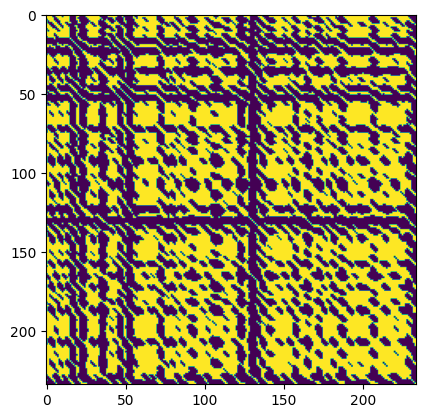

In [670]:
plt.imshow(rp)

In [395]:
twinSurr = Surrogates(data)

Generated an instance of the Surrogates class.


In [526]:
surr = twinSurr.twin_surrogates(original_data= data, dimension=3,delay=4,threshold=0.1)

In [397]:
data

array([[ 0.02425754,  0.016263  , -0.00315313, ..., -0.06804128,
        -0.02362328,  0.02707631],
       [-0.00536479,  0.02299598,  0.01415117, ...,  0.09208544,
         0.13798351,  0.11079219],
       [-0.03526017, -0.05838364, -0.06834359, ...,  0.09107414,
         0.0302683 , -0.02740371],
       ...,
       [-0.05737086, -0.0278434 ,  0.04112744, ..., -0.03367894,
        -0.03356682, -0.00899026],
       [ 0.00437215, -0.03932919, -0.04273542, ..., -0.01559454,
         0.04060807,  0.04061458],
       [-0.00532461, -0.00580968,  0.0214598 , ...,  0.05140153,
         0.00614655, -0.03495494]])

In [398]:
surr

array([[ 0.0417419 , -0.02178032, -0.06301   , ..., -0.06199762,
        -0.01011726,  0.01843434],
       [ 0.04966455,  0.03264314,  0.02318914, ..., -0.0483289 ,
        -0.03953428, -0.03399448],
       [ 0.08560986, -0.00071301, -0.09381858, ..., -0.02310661,
        -0.05785083, -0.07602765],
       ...,
       [ 0.00131134,  0.02462055,  0.02008612, ..., -0.03852837,
        -0.06499883, -0.03212589],
       [-0.0458454 , -0.06850308, -0.04163555, ...,  0.01971143,
         0.05882759,  0.04286768],
       [-0.03208611, -0.04375519, -0.05580242, ...,  0.050872  ,
         0.00162201, -0.03208611]])

In [399]:
acf_surr_all

[array([ 1.        ,  0.7990149 ,  0.349151  , -0.06227545, -0.24734175,
        -0.23144808]),
 array([ 1.        ,  0.80211726,  0.35295172, -0.06802509, -0.28408829,
        -0.32351544]),
 array([ 1.        ,  0.76549591,  0.30749448, -0.05892191, -0.18277024,
        -0.13620482]),
 array([ 1.        ,  0.7280208 ,  0.18731028, -0.20777409, -0.25783284,
        -0.10823307]),
 array([ 1.        ,  0.81533949,  0.38978177, -0.01342186, -0.20839871,
        -0.206129  ]),
 array([ 1.        ,  0.7435038 ,  0.22283093, -0.15530652, -0.20222615,
        -0.0751162 ]),
 array([ 1.        ,  0.76480371,  0.26742096, -0.13570035, -0.23888767,
        -0.11980955]),
 array([ 1.        ,  0.81812932,  0.39910917, -0.00504058, -0.22512402,
        -0.27112258]),
 array([ 1.        ,  0.7471419 ,  0.21991859, -0.1976123 , -0.30850568,
        -0.22870985]),
 array([ 1.        ,  0.75464293,  0.22198635, -0.20636728, -0.3033001 ,
        -0.16422977]),
 array([ 1.        ,  0.82393314,  0.424

In [400]:
acf_surr_all = []
for i in range(len(surr)):
    surr_acf = sm.tsa.acf(surr[i,:], nlags=5)
    acf_surr_all.append(surr_acf)

In [401]:
acf_real_all = []
for i in range(len(surr)):
    real_acf = sm.tsa.acf(data[i,5:], nlags=5)
    acf_real_all.append(real_acf)

In [402]:
surr_stack = np.stack(acf_surr_all)
real_stack = np.stack(acf_real_all)

In [403]:
surr_stack

array([[ 1.        ,  0.80177586,  0.35688853, -0.04133086, -0.20193306,
        -0.1590245 ],
       [ 1.        ,  0.78787311,  0.30878026, -0.12524886, -0.31636018,
        -0.30427664],
       [ 1.        ,  0.82307486,  0.42828409,  0.03607836, -0.19109199,
        -0.23864117],
       ...,
       [ 1.        ,  0.73972311,  0.18249275, -0.23530913, -0.27656204,
        -0.08123328],
       [ 1.        ,  0.71639782,  0.12747206, -0.26641509, -0.23387877,
         0.00752516],
       [ 1.        ,  0.71380601,  0.12171647, -0.27304075, -0.24785107,
        -0.03686977]])

In [404]:
real_stack

array([[ 1.        ,  0.7835044 ,  0.29177824, -0.14596884, -0.30220928,
        -0.20392172],
       [ 1.        ,  0.75170277,  0.22686192, -0.17603041, -0.25545704,
        -0.14113012],
       [ 1.        ,  0.80486975,  0.36323099, -0.04946694, -0.24156593,
        -0.22413236],
       ...,
       [ 1.        ,  0.73562719,  0.19654628, -0.19872356, -0.23156915,
        -0.04790509],
       [ 1.        ,  0.71147004,  0.11517671, -0.28596096, -0.25392068,
        -0.00109816],
       [ 1.        ,  0.72037191,  0.13701795, -0.26387933, -0.26244151,
        -0.07622939]])

In [405]:
surr_means = []
for i in range(5):
    surr_means.append(np.mean(surr_stack[:,i]))


In [406]:
real_means = []
for i in range(5):
    real_means.append(np.mean(real_stack[:,i]))


In [407]:
np.sqrt(sum((np.array(surr_means) - np.array(real_means))**2)/5)

0.00636304822912721

In [408]:
surr_stds= []
for i in range(5):
    surr_stds.append(np.std(surr_stack[:, i]))

real_stds = []
for i in range(5):
    real_stds.append(np.std(real_stack[:, i]))

In [409]:
np.sqrt(sum((np.array(surr_stds) - np.array(real_stds))**2)/5)

0.01139631956136451

In [257]:
data

array([[ 0.02425754,  0.016263  , -0.00315313, ..., -0.06804128,
        -0.02362328,  0.02707631],
       [-0.00536479,  0.02299598,  0.01415117, ...,  0.09208544,
         0.13798351,  0.11079219],
       [-0.03526017, -0.05838364, -0.06834359, ...,  0.09107414,
         0.0302683 , -0.02740371],
       ...,
       [-0.05737086, -0.0278434 ,  0.04112744, ..., -0.03367894,
        -0.03356682, -0.00899026],
       [ 0.00437215, -0.03932919, -0.04273542, ..., -0.01559454,
         0.04060807,  0.04061458],
       [-0.00532461, -0.00580968,  0.0214598 , ...,  0.05140153,
         0.00614655, -0.03495494]])

In [393]:
data

array([[ 0.02425754,  0.016263  , -0.00315313, ..., -0.06804128,
        -0.02362328,  0.02707631],
       [-0.00536479,  0.02299598,  0.01415117, ...,  0.09208544,
         0.13798351,  0.11079219],
       [-0.03526017, -0.05838364, -0.06834359, ...,  0.09107414,
         0.0302683 , -0.02740371],
       ...,
       [-0.05737086, -0.0278434 ,  0.04112744, ..., -0.03367894,
        -0.03356682, -0.00899026],
       [ 0.00437215, -0.03932919, -0.04273542, ..., -0.01559454,
         0.04060807,  0.04061458],
       [-0.00532461, -0.00580968,  0.0214598 , ...,  0.05140153,
         0.00614655, -0.03495494]])

In [633]:
def threshold_optmiser(threshold):
    t = Surrogates(data)
    s = t.twin_surrogates(original_data= data, dimension=3,delay=1,threshold= threshold)


    acf_s_all = []
    for i in range(len(s)):
        s_acf = sm.tsa.acf(s[i,:], nlags=5)
        acf_s_all.append(s_acf)

    acf_r_all = []
    for i in range(len(s)):
        r_acf = sm.tsa.acf(data[i,:], nlags=5)
        acf_r_all.append(r_acf)

    s_stack = np.stack(acf_s_all)
    r_stack = np.stack(acf_r_all)

    s_means = []
    for i in range(5):
        s_means.append(np.mean(s_stack[:,i]))

    r_means = []
    for i in range(5):
        r_means.append(np.mean(r_stack[:,i]))

    s_stds= []
    for i in range(5):
        s_stds.append(np.std(s_stack[:, i]))

    r_stds = []
    for i in range(5):
        r_stds.append(np.std(r_stack[:, i]))

    t.clear_cache()

    return np.sqrt(sum((np.array(s_means) - np.array(r_means))**2)/5), np.sqrt(sum((np.array(s_stds) - np.array(r_stds))**2)/5)


In [411]:
threshold_optmiser(1)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 4 ...
Finding twins...


(0.39587979548419694, 0.03594642709497278)

In [634]:
threshold_range = np.arange(0,1.1, 0.1)

In [635]:
t_mean = []
t_std = []

for t in threshold_range:
    m,std = threshold_optmiser(t)
    t_mean.append(m)
    t_std.append(std)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generate

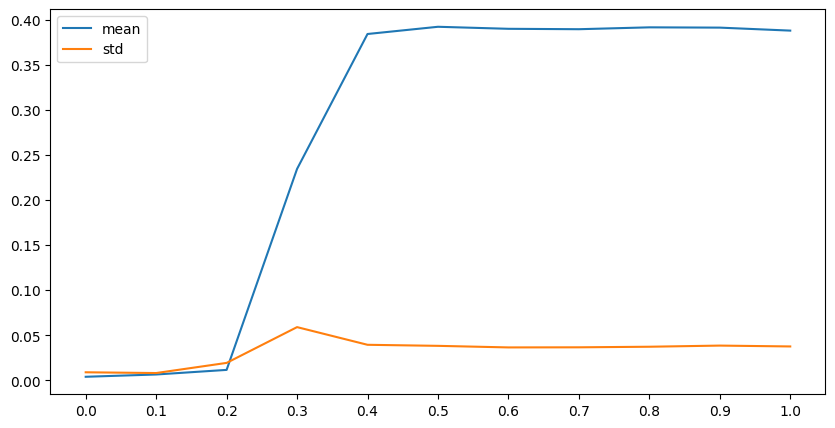

In [638]:
plt.figure(figsize=(10,5))
plt.plot(t_mean, label = 'mean')
plt.plot(t_std, label = 'std')
plt.xticks(ticks=range(len(threshold_range)),labels= np.round(threshold_range,decimals=1 ))
plt.legend()
plt.show()

In [639]:
threshold_range = np.arange(0,0.21, 0.01)

In [640]:
t_mean = []
t_std = []

for t in threshold_range:
    m,std = threshold_optmiser(t)
    t_mean.append(m)
    t_std.append(std)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generate

In [641]:
t_mean

[0.003152041585272065,
 0.0053513643877668255,
 0.008857207817868201,
 0.005175875127279455,
 0.0051946570613391994,
 0.004795786674582552,
 0.005925977594199347,
 0.006048683143383865,
 0.006090612062474664,
 0.005046427174731947,
 0.006057013180845585,
 0.006292485136802576,
 0.0057949263017434164,
 0.0037910095182123534,
 0.0045209770775232715,
 0.006396760879151109,
 0.00766971490296784,
 0.004637124388738279,
 0.004097441355971713,
 0.006948604144363716,
 0.01068531913801931]

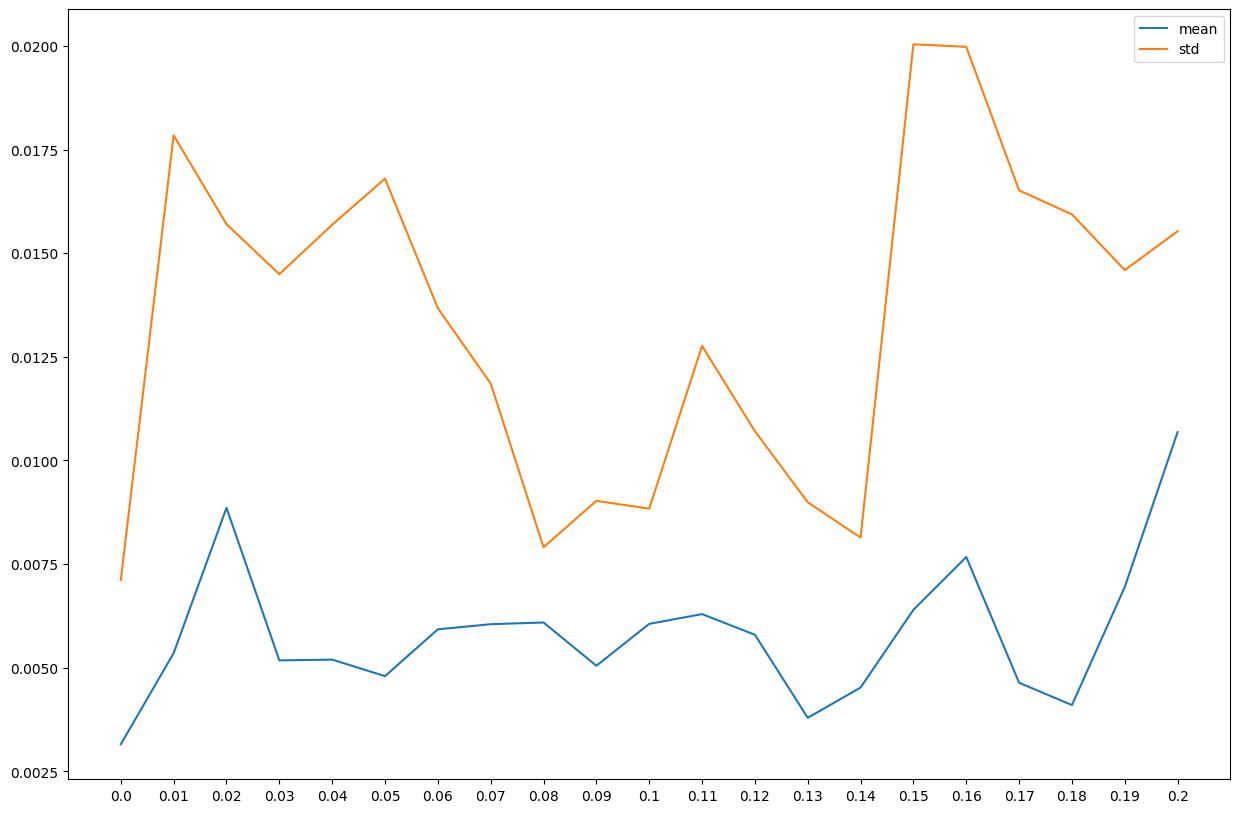

In [642]:
plt.figure(figsize=(15,10))
plt.plot(t_mean, label = 'mean')
plt.plot(t_std, label='std')
plt.xticks(ticks=range(len(threshold_range)),labels= np.round(threshold_range,decimals=2 ))
plt.legend(('mean', 'std'))
plt.show()

# 0.1 is optimal
- mean and standard deviation is close together

In [551]:
# threshold optimiser 2

In [648]:
data

array([[ 0.02425754,  0.016263  , -0.00315313, ..., -0.06804128,
        -0.02362328,  0.02707631],
       [-0.00536479,  0.02299598,  0.01415117, ...,  0.09208544,
         0.13798351,  0.11079219],
       [-0.03526017, -0.05838364, -0.06834359, ...,  0.09107414,
         0.0302683 , -0.02740371],
       ...,
       [-0.05737086, -0.0278434 ,  0.04112744, ..., -0.03367894,
        -0.03356682, -0.00899026],
       [ 0.00437215, -0.03932919, -0.04273542, ..., -0.01559454,
         0.04060807,  0.04061458],
       [-0.00532461, -0.00580968,  0.0214598 , ...,  0.05140153,
         0.00614655, -0.03495494]])

In [643]:
twinSurr.clear_cache()

In [8]:
twinSurr = Surrogates(original_data=data)

Generated an instance of the Surrogates class.


In [9]:
surr = twinSurr.twin_surrogates(original_data=data, dimension=3, delay=1, threshold=0.1)

Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...


In [672]:
data

array([[ 0.02420204,  0.0162075 , -0.00320862, ..., -0.06809674,
        -0.02367876,  0.02702081],
       [-0.00559596,  0.02276463,  0.01391988, ...,  0.09185366,
         0.13775143,  0.11056029],
       [-0.03544477, -0.05856815, -0.06852806, ...,  0.09088903,
         0.03008343, -0.02758834],
       ...,
       [-0.055276  , -0.02576342,  0.04317267, ..., -0.03159602,
        -0.03148396, -0.00691978],
       [ 0.00403816, -0.0396626 , -0.04306879, ..., -0.01592826,
         0.04027361,  0.04028011],
       [-0.00449744, -0.00498246,  0.02228482, ...,  0.05222413,
         0.0069728 , -0.03412537]])

In [11]:
surr

array([[-0.08741346, -0.10665515, -0.10564037, ..., -0.05921446,
        -0.00620146,  0.02262699],
       [ 0.02175107,  0.02265254, -0.00558791, ..., -0.02692649,
        -0.02205923, -0.01292432],
       [-0.07571007, -0.11477195, -0.06999738, ..., -0.01703433,
         0.03382879,  0.07603637],
       ...,
       [ 0.03791893, -0.00313021, -0.03371271, ..., -0.04242301,
        -0.07177355, -0.07334025],
       [-0.02012555,  0.01070528,  0.03275537, ..., -0.01690284,
        -0.08147893, -0.10266231],
       [ 0.15307523,  0.10831556, -0.00177945, ...,  0.0756712 ,
        -0.04412986, -0.0810185 ]])

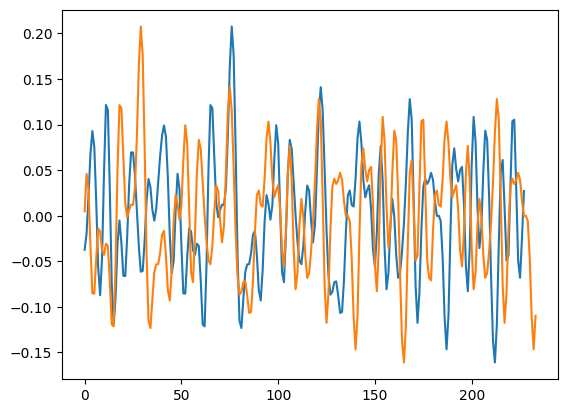

In [674]:
plt.plot(data[0,8:])
plt.plot(surr[0,:])

In [12]:
surr

array([[-0.08741346, -0.10665515, -0.10564037, ..., -0.05921446,
        -0.00620146,  0.02262699],
       [ 0.02175107,  0.02265254, -0.00558791, ..., -0.02692649,
        -0.02205923, -0.01292432],
       [-0.07571007, -0.11477195, -0.06999738, ..., -0.01703433,
         0.03382879,  0.07603637],
       ...,
       [ 0.03791893, -0.00313021, -0.03371271, ..., -0.04242301,
        -0.07177355, -0.07334025],
       [-0.02012555,  0.01070528,  0.03275537, ..., -0.01690284,
        -0.08147893, -0.10266231],
       [ 0.15307523,  0.10831556, -0.00177945, ...,  0.0756712 ,
        -0.04412986, -0.0810185 ]])

In [13]:
surr_all = np.stack([sm.tsa.acf(surr[i,:], nlags=5) for i in range(len(surr))])

In [26]:
np.stack([surr_all,surr_all])[:,199,:]

array([[ 1.        ,  0.68707483,  0.0637044 , -0.3271954 , -0.26764862,
        -0.02820085],
       [ 1.        ,  0.68707483,  0.0637044 , -0.3271954 , -0.26764862,
        -0.02820085]])

In [25]:
np.mean(np.stack([surr_all,surr_all])[:,199,:], axis=0)

array([ 1.        ,  0.68707483,  0.0637044 , -0.3271954 , -0.26764862,
       -0.02820085])

In [683]:
surr_all[0,1:]

array([ 0.78914041,  0.31542084, -0.10627011, -0.26843415, -0.20530626])

In [30]:
np.mean(np.stack([surr_all,surr_all])[:,199,:], axis=0) - np.stack([sm.tsa.acf(data[i,:], nlags=5) for i in range(len(data))])[0]

array([ 0.        , -0.09621726, -0.22791097, -0.18165549,  0.03355178,
        0.17504299])

In [93]:
def optimiser(n_twins, d=1, threshold = 0.08):

    r_acf = np.stack([sm.tsa.acf(data[i,:], nlags=5) for i in range(len(data))])
    t = Surrogates(data)

    acf_all_iter = []
    for _ in range(n_twins):

        s = t.twin_surrogates(original_data= data, dimension=3,delay=d,threshold= threshold)

        acf_s_all = np.stack([sm.tsa.acf(s[i,:], nlags=5) for i in range(len(s))])

        acf_all_iter.append(acf_s_all)

    acf_all = np.stack(acf_all_iter)

    roi_m = []
    roi_E = []
    roi_std = []
    for i in range(200):
        acf_m = np.mean(acf_all[:,i,:], axis=0)
        acf_std = np.std(acf_all[:,i,:], axis=0)
        r_m = r_acf[i]
        E = np.sqrt(np.sum((acf_m - r_m)**2)/5)
        roi_E.append(E)
        roi_std.append(acf_std)
        roi_m.append(acf_m)

    t.clear_cache()

    return roi_E, (roi_m,roi_std)

In [34]:
error, stats = optimser(100)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...


<BarContainer object of 200 artists>

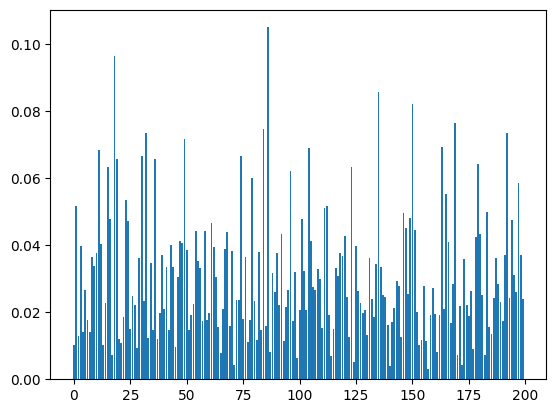

In [38]:
plt.bar(range(200) ,error)

In [59]:
e1,stats1 =  optimser(100, threshold=0.01, d=1 )

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...


<BarContainer object of 200 artists>

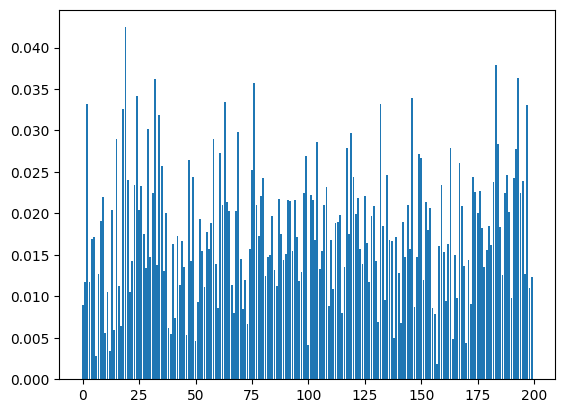

In [60]:
plt.bar(range(200) ,e1)

In [82]:
thresh = np.arange(0.01, 0.11, 0.01)
delays = np.arange(1,5,1)

In [86]:
combos = [(x , y) for x in thresh for y in delays]

In [ ]:
e1,stats1 =  optimser(100, threshold=0.01, d=1 )

In [101]:
combo_es = {'threshold': [], 'delay': [], 'roi_means': [],'param_error_mean':[], 'param_error_std': []}
for t,d in combos:
    e , _ = optimiser(100, threshold = round(t,2), d=d )
    combo_es['threshold'].append(t)
    combo_es['delay'].append(d)
    combo_es['roi_means'].append(e)
    combo_es['param_error_mean'].append(np.mean(e))
    combo_es['param_error_std'].append(np.std(e))

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 2 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 3 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 4 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 1 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 2 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 3 ...
Finding twins...
Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 4 ...
Finding twins...
Generate

In [173]:
es_df = pd.DataFrame(combo_es)
es_df.head()

,threshold,delay,roi_means,param_error_mean,param_error_std
0,0.01,1,"[0.0058957441510031575, 0.01697401255285113, 0...",0.017051,0.008411
1,0.01,2,"[0.019138673988866428, 0.0365873117536923, 0.0...",0.019486,0.012290
2,0.01,3,"[0.039288912630120625, 0.05348616174040534, 0....",0.028395,0.017038
3,0.01,4,"[0.02791750803512728, 0.03360480759242532, 0.0...",0.033919,0.019372
4,0.02,1,"[0.019979261977035652, 0.023248036468862032, 0...",0.018116,0.011844


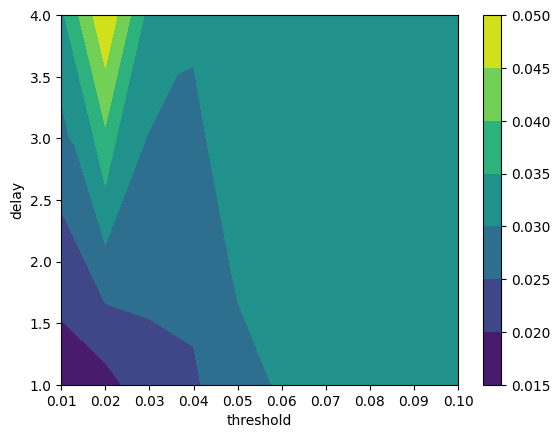

In [166]:

X, Y = np.meshgrid(combo_es['threshold'], combo_es['delay'])
Z = griddata((combo_es['threshold'], combo_es['delay']), combo_es['param_error_mean'], (X, Y), method='linear')
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_xlabel('threshold')
ax.set_ylabel('delay')
plt.show()

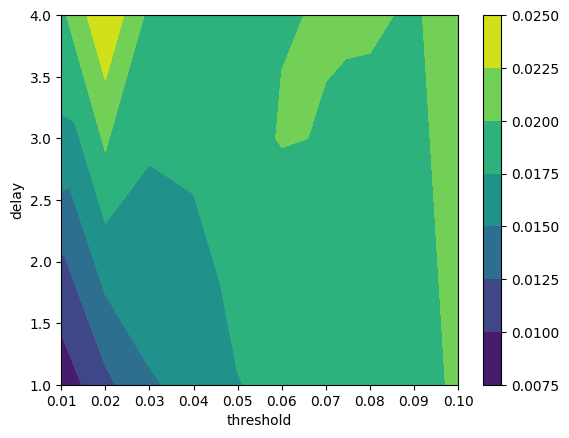

In [167]:
X, Y = np.meshgrid(combo_es['threshold'], combo_es['delay'])
Z = griddata((combo_es['threshold'], combo_es['delay']), combo_es['param_error_std'], (X, Y), method='linear')
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_xlabel('threshold')
ax.set_ylabel('delay')
plt.show()

In [183]:
x , y, z, c = es_df['threshold'].to_numpy(), es_df['delay'].to_numpy(), es_df['param_error_mean'].to_numpy(), es_df['param_error_std'].to_numpy()
X, Y = np.meshgrid(combo_es['threshold'], combo_es['delay'])
Z = griddata((combo_es['threshold'], combo_es['delay']), combo_es['param_error_mean'], (X, Y), method='linear')

In [182]:
c2 = griddata((x, y), c, (X, Y), method='linear');
c2[c2 < c.min()] = c.min();

In [217]:
color_dimension = c2; # It must be in 2D - as for "X, Y, Z".
minn, maxx = color_dimension.min(), color_dimension.max();
norm = matplotlib.colors.Normalize(minn, maxx);
m = plt.cm.ScalarMappable(norm=norm, cmap = 'rainbow');
m.set_array([]);
fcolors = m.to_rgba(color_dimension);

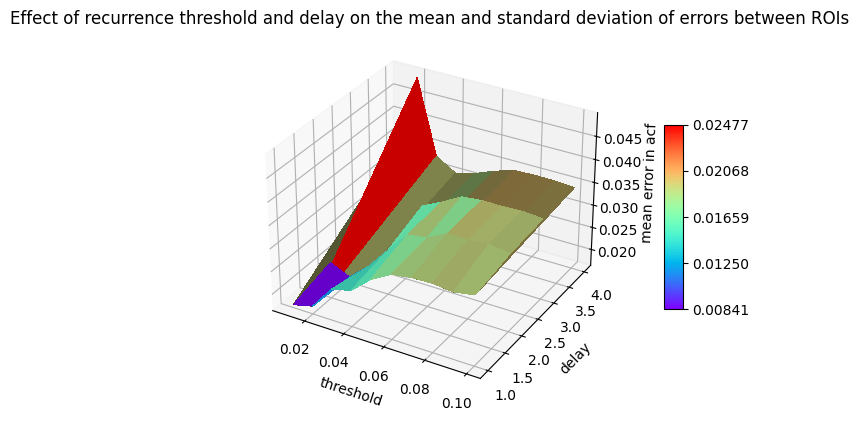

In [245]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax1=plt.subplots(1,1)
surf = ax.plot_surface(X, Y, Z, facecolors = fcolors, linewidth=0, rstride=1, cstride=1,
                       antialiased=False);
fig.colorbar(m, shrink=0.5, aspect=10,
             ax=ax,
             ticks = np.linspace(minn, maxx, 5),
             pad=0.1);
cbar.ax.get_yaxis().labelpad = 10;
cbar.ax.set_ylabel('Standard deviation', rotation = 270);
ax.set_xlabel('threshold')
ax.set_ylabel('delay')
ax.set_zlabel('mean error in acf');
plt.title('Effect of recurrence threshold and delay on the mean and standard deviation of errors between ROIs');
plt.show();

In [246]:
thresh

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [249]:
es_df['param_error_mean'][es_df['delay']==1]

0     0.017051
4     0.018116
8     0.023259
12    0.024373
16    0.028132
20    0.030570
24    0.031235
28    0.031369
32    0.030909
36    0.031677
Name: param_error_mean, dtype: float64

In [252]:
delays

array([1, 2, 3, 4])

In [326]:
thresh

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

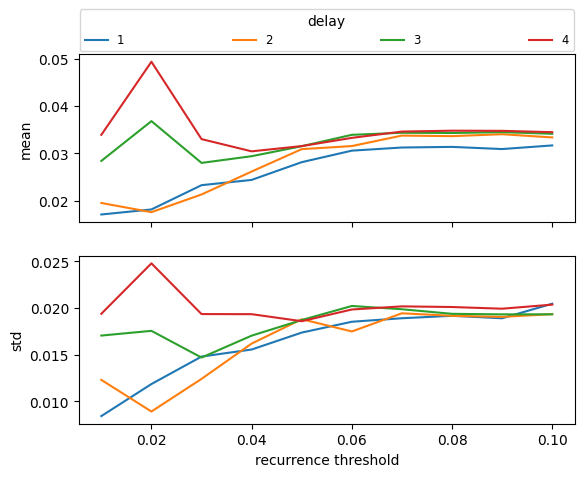

In [331]:
fig, (ax0,ax1) =plt.subplots(nrows=2,ncols=1, sharex= True)
ax0.plot(thresh,es_df['param_error_mean'][es_df['delay']==1],label= '1')
ax0.plot(thresh,es_df['param_error_mean'][es_df['delay']==2], label='2')
ax0.plot(thresh,es_df['param_error_mean'][es_df['delay']==3],label='3')
ax0.plot(thresh,es_df['param_error_mean'][es_df['delay']==4],label='4')
ax0.set_ylabel('mean')
ax1.plot(thresh,es_df['param_error_std'][es_df['delay']==1])
ax1.plot(thresh,es_df['param_error_std'][es_df['delay']==2])
ax1.plot(thresh,es_df['param_error_std'][es_df['delay']==3])
ax1.plot(thresh,es_df['param_error_std'][es_df['delay']==4])
ax1.set_ylabel('std')

plt.xlabel('recurrence threshold')
ax0.legend(loc = 'lower center',bbox_to_anchor=(0,1.01,1,0.85), borderaxespad=0.1,title='delay',ncol=4,mode="expand",fontsize = 'small')
plt.show()

delay of 2 and threshold of 0.02 provides the lowest mean error and lowest standard deviation in error among ROIS

0.09999999999999999

In [324]:
e_op, _= optimiser(100,threshold=0.02,d=2)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 2 ...
Finding twins...


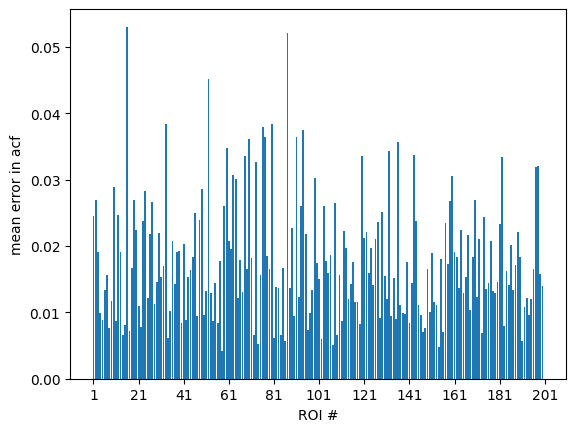

In [325]:
plt.figure()
plt.bar(range(200) ,e_op)
plt.xticks(ticks= np.arange(0,220,20) ,labels=[i+1 for i in np.arange(0,220,20)])
plt.xlabel('ROI #')
plt.ylabel('mean error in acf')
plt.show()

In [332]:
surr

array([[-0.08741346, -0.10665515, -0.10564037, ..., -0.05921446,
        -0.00620146,  0.02262699],
       [ 0.02175107,  0.02265254, -0.00558791, ..., -0.02692649,
        -0.02205923, -0.01292432],
       [-0.07571007, -0.11477195, -0.06999738, ..., -0.01703433,
         0.03382879,  0.07603637],
       ...,
       [ 0.03791893, -0.00313021, -0.03371271, ..., -0.04242301,
        -0.07177355, -0.07334025],
       [-0.02012555,  0.01070528,  0.03275537, ..., -0.01690284,
        -0.08147893, -0.10266231],
       [ 0.15307523,  0.10831556, -0.00177945, ...,  0.0756712 ,
        -0.04412986, -0.0810185 ]])

In [333]:
data

array([[ 0.02420204,  0.0162075 , -0.00320862, ..., -0.06809674,
        -0.02367876,  0.02702081],
       [-0.00559596,  0.02276463,  0.01391988, ...,  0.09185366,
         0.13775143,  0.11056029],
       [-0.03544477, -0.05856815, -0.06852806, ...,  0.09088903,
         0.03008343, -0.02758834],
       ...,
       [-0.055276  , -0.02576342,  0.04317267, ..., -0.03159602,
        -0.03148396, -0.00691978],
       [ 0.00403816, -0.0396626 , -0.04306879, ..., -0.01592826,
         0.04027361,  0.04028011],
       [-0.00449744, -0.00498246,  0.02228482, ...,  0.05222413,
         0.0069728 , -0.03412537]])

In [ ]:
pd.read_csv(roi_path, sep='\t', lineterminator='\n')

In [339]:
columns = np.array([f'#{i+1}' for i in range(200)])

In [344]:
s = surr.T

In [346]:
s.shape

(234, 200)

In [357]:
np.save('try.npy',s)

In [358]:
np.load('try.npy')

array([[-0.08741346,  0.02175107, -0.07571007, ...,  0.03791893,
        -0.02012555,  0.15307523],
       [-0.10665515,  0.02265254, -0.11477195, ..., -0.00313021,
         0.01070528,  0.10831556],
       [-0.10564037, -0.00558791, -0.06999738, ..., -0.03371271,
         0.03275537, -0.00177945],
       ...,
       [-0.05921446, -0.02692649, -0.01703433, ..., -0.04242301,
        -0.01690284,  0.0756712 ],
       [-0.00620146, -0.02205923,  0.03382879, ..., -0.07177355,
        -0.08147893, -0.04412986],
       [ 0.02262699, -0.01292432,  0.07603637, ..., -0.07334025,
        -0.10266231, -0.0810185 ]])

In [378]:
df = pd.read_csv(os.path.join(os.getcwd(), 'phenotype_files/pheno_nn.csv'))

In [363]:
twinSurr = Surrogates(original_data=data)
surr = twinSurr.twin_surrogates(original_data=data, dimension=3, delay=2, threshold=0.02)

Generated an instance of the Surrogates class.
Embedding all time series in dimension 3 and with lag 2 ...
Finding twins...


In [369]:
twinSurr.

AttributeError: 'Surrogates' object has no attribute '_twins_s'

In [372]:
gim = []
for _ in range(2):
    s = twinSurr.twin_surrogates(original_data= data, dimension=3,delay=2,threshold= 0.02)

    gim.append(s)

In [377]:
gim[0]

array([[-0.06821909, -0.06272648, -0.0392869 , ..., -0.01098296,
         0.04866932,  0.11339935],
       [ 0.04782101, -0.00291704, -0.04486266, ...,  0.04869641,
         0.0311639 , -0.00857644],
       [ 0.05483964,  0.03343726,  0.0092903 , ...,  0.02564137,
         0.07263165,  0.09674607],
       ...,
       [-0.06529532, -0.04674942,  0.00186739, ..., -0.08493612,
        -0.09215305, -0.06725432],
       [-0.09306365, -0.12951228,  0.10593774, ...,  0.00863255,
        -0.02633365, -0.03125608],
       [ 0.02087674, -0.06989503, -0.10162766, ...,  0.07335926,
         0.06488819,  0.06420956]])

In [381]:
sub_id = df.FILE_ID[0]

In [408]:
for j in range(98,100):
    print('{}_surr_{:03d}.npy'.format(sub_id, j+1))

Pitt_0050002_surr_099.npy
Pitt_0050002_surr_100.npy


In [ ]:
'{} YES votes  {:2.2%}'.format(sub_id, j)

In [416]:
test = normalize(test.to_numpy()).T

In [418]:
test#%%

array([[ 0.05134446,  0.02465048, -0.00497894, ..., -0.08343526,
        -0.03150202,  0.04334144],
       [-0.00896246,  0.02613853,  0.01630666, ...,  0.0849632 ,
         0.13835238,  0.13387985],
       [-0.07941721, -0.0940788 , -0.11230728, ...,  0.11761308,
         0.04226956, -0.04673598],
       ...,
       [-0.06878403, -0.02298382,  0.03929496, ..., -0.02270728,
        -0.02456847, -0.00651039],
       [ 0.01085143, -0.0764103 , -0.08465304, ..., -0.02472026,
         0.06786741,  0.08183837],
       [-0.00949462, -0.00754092,  0.03441111, ...,  0.06367449,
         0.00923119, -0.05446949]])

In [436]:
t1 = np.load('/Users/admin/Documents/MscProject/twin_augmented/Caltech_0051459_surr_001.npy')

In [437]:
len(t1)

142

In [423]:
t1 = t1[5:116]

In [424]:
t1

array([[-5.22172035e-02,  8.50775721e-02, -4.10064442e-02, ...,
         1.34862677e-02,  7.87398561e-02,  1.32552853e-01],
       [-6.09649501e-02,  5.64548997e-02, -1.91723715e-02, ...,
         6.07626766e-03,  3.17054896e-02,  1.26217705e-01],
       [-3.63430847e-02, -9.20699395e-03,  1.80140421e-03, ...,
         2.34027051e-03, -2.87124332e-02,  1.09577847e-01],
       ...,
       [ 8.02099182e-03, -5.59119661e-02, -5.62401155e-02, ...,
         9.52207513e-03,  1.20615998e-01, -3.35145758e-02],
       [ 2.11214692e-02, -6.25726495e-02, -3.60688287e-02, ...,
         1.49183095e-03,  7.80272226e-02, -4.17708481e-03],
       [ 2.67946476e-02, -5.45285654e-02, -4.76010606e-07, ...,
        -2.67051662e-03, -3.00633023e-02, -4.89409130e-03]])

In [428]:
np.corrcoef(t1[0:71],rowvar=False)

array([[ 1.00000000e+00, -3.09038181e-01, -1.83447822e-02, ...,
        -8.56145603e-02,  1.20423871e-01,  1.19438852e-01],
       [-3.09038181e-01,  1.00000000e+00,  1.65633271e-01, ...,
        -1.01879820e-01, -3.19112354e-01,  2.52638376e-01],
       [-1.83447822e-02,  1.65633271e-01,  1.00000000e+00, ...,
        -2.46188253e-01, -7.15208686e-02, -1.80659646e-02],
       ...,
       [-8.56145603e-02, -1.01879820e-01, -2.46188253e-01, ...,
         1.00000000e+00,  7.15114003e-04,  5.43951412e-02],
       [ 1.20423871e-01, -3.19112354e-01, -7.15208686e-02, ...,
         7.15114003e-04,  1.00000000e+00, -2.98641715e-01],
       [ 1.19438852e-01,  2.52638376e-01, -1.80659646e-02, ...,
         5.43951412e-02, -2.98641715e-01,  1.00000000e+00]])

In [431]:
sub_id = df.FILE_ID

In [433]:
l = ['{}_surr_{:03d}.npy'.format(sub_id[i], j+1) for i in range(len(sub_id)) for j in range(100)]

In [3]:
'.1D' in 'Caltech_0051459_gci.pkl'

False